# Saudi Arabia Used Cars Analysis

## Defining the problem statment

<small>In this project, we analyze a used cars dataset from Saudi Arabia using Pandas, NumPy, Matplotlib, and Seaborn.
We explore relationships and correlations between features like year, mileage, engine size, fuel type, gearbox, and price.
The main goal is to identify the key factors that most influence used car prices, helping buyers, sellers, and dealers make better decisions.</small>

## Collecting the data

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Loading Data
df_Used_Cars=pd.read_csv('UsedCarsSA_Unclean_EN.csv')


In [392]:
df_Used_Cars

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,Used,77000,Riyadh,75000,False
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,Used,150000,Riyadh,53000,False
8245,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,NaN,Gas,Automatic,Used,260,Najran,Negotiable,True
8246,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,Used,18500,Aseer,22000,False


In [199]:
df_Used_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
 14  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 910.3+ KB


## clean data 

In [424]:
# Create Brand_Model column 
df_Used_Cars['Brand_Model'] = df_Used_Cars['Make'] + ' ' + df_Used_Cars['Type']

In [425]:
# remove unnecessary columns
df_Used_Cars=df_Used_Cars.drop(columns=['Link','Condition'])

In [426]:
# convert Price to numeric
df_Used_Cars['Price']=pd.to_numeric(
    df_Used_Cars['Price'],
    errors='coerce')

In [427]:
df_Used_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8248 non-null   object 
 1   Type         8248 non-null   object 
 2   Year         8248 non-null   int64  
 3   Origin       8153 non-null   object 
 4   Color        8248 non-null   object 
 5   Options      8139 non-null   object 
 6   Engine_Size  5982 non-null   float64
 7   Fuel_Type    8248 non-null   object 
 8   Gear_Type    8174 non-null   object 
 9   Mileage      8248 non-null   int64  
 10  Region       8248 non-null   object 
 11  Price        5652 non-null   float64
 12  Negotiable   8248 non-null   bool   
 13  Brand_Model  8248 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 845.9+ KB


In [428]:
# filter unrealistic mileage
df_Used_Cars=df_Used_Cars[(df_Used_Cars['Mileage']>=100) &
                    (df_Used_Cars['Mileage']<= 500000 )]

In [429]:
# Show all unique years present in the dataset
df_Used_Cars['Year'].unique()

array([2018, 2016, 2019, 2011, 2009, 2017, 2014, 2020, 2021, 2008, 2015,
       2013, 1993, 2012, 2010, 2006, 2007, 1992, 2001, 1982, 1996, 1997,
       1999, 2022, 2005, 1984, 1995, 2002, 2000, 1998, 1991, 2004, 1986,
       1988, 2003, 1983, 1989, 1990, 1979, 1978, 1985, 1936, 1977, 1980,
       1987, 1994, 1964, 1963, 1981, 1965, 1972, 1970, 1975, 1968, 1961])

In [430]:
# Keep only cars from 2010 onwards
df_Used_Cars = df_Used_Cars[df_Used_Cars['Year'] >= 2010]

In [431]:
df_Used_Cars.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Brand_Model
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0,False,Chrysler C300
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,NaN,True,Nissan Patrol
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0,False,Nissan Sunny
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0,False,Hyundai Elantra
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0,False,Hyundai Elantra


In [433]:
df_Used_Cars.drop_duplicates(inplace=True)

## Exploratory Data Analysis

### 1. What are the top 10 most popular used car brands in Saudi Arabia?

C:\Users\HP\AppData\Local\Temp\ipykernel_18592\4161681537.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_used_cars, y='Make', x='Percentage', palette='dark:b')


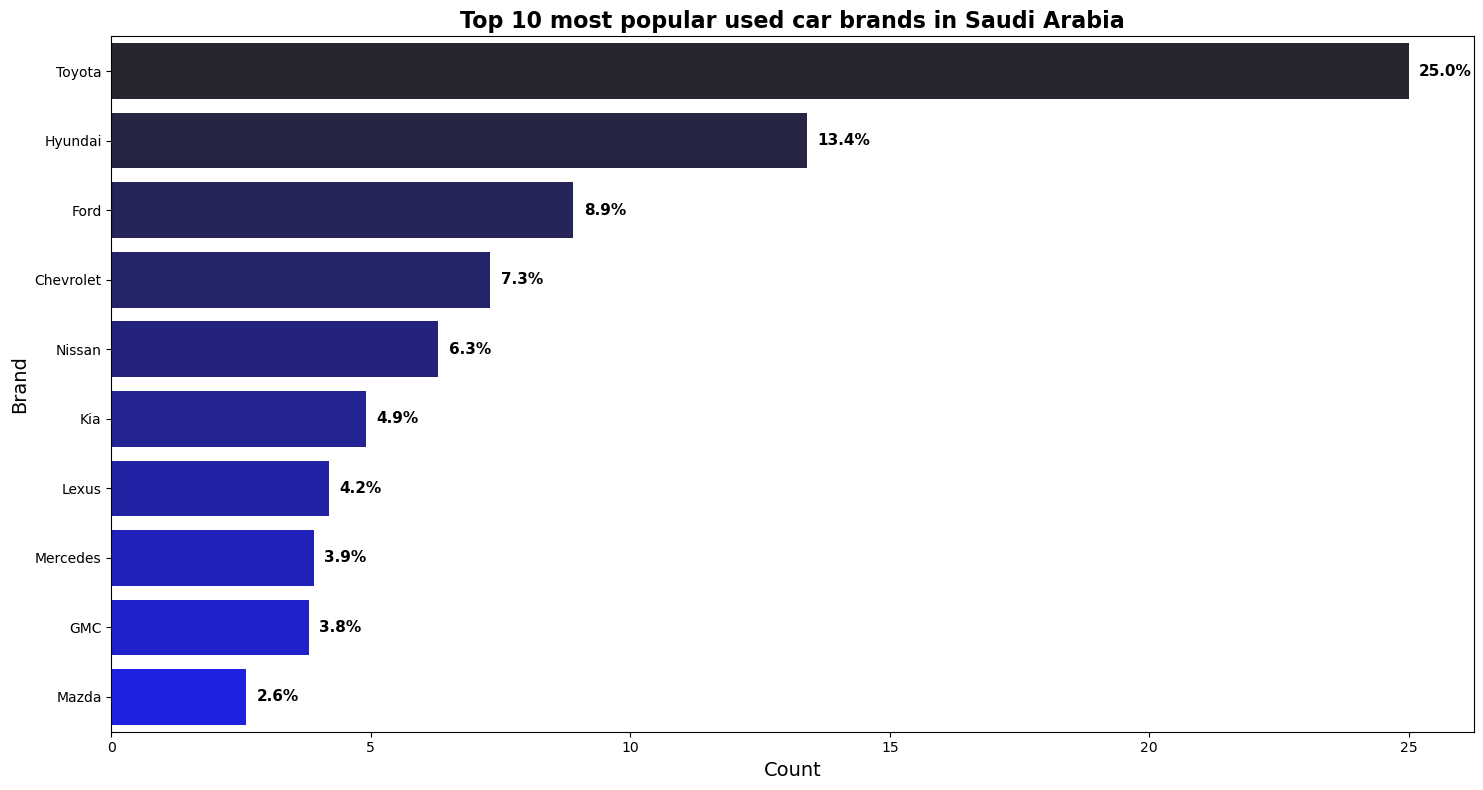

In [434]:
# total number of used cars in the dataset
total = df_Used_Cars['Make'].count()  

# Get top 10 with counts and percentages
top_used_cars = df_Used_Cars['Make'].value_counts().head(10).reset_index()
top_used_cars['Percentage']=(top_used_cars['count'] / total * 100).round(1)
top_used_cars['Label'] = top_used_cars['Make'] + ' (' + top_used_cars['Percentage'].astype(str) + '%)'


# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=top_used_cars, y='Make', x='Percentage', palette='dark:b')
plt.title('Top 10 most popular used car brands in Saudi Arabia', fontsize=16,fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Brand', fontsize=14)

# Label each bar with its percentage value
for i,v in enumerate(top_used_cars['Percentage']):
    plt.text(v+0.2,i,f'{v}%',
    va='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

<small>From the above figure, we can conclude that Toyota dominates the used car market in Saudi Arabia with approximately 25% share, far ahead of Hyundai at approximately 13.4%, showing a strong preference for Japanese reliability and availability in the local market.</small>

### 2. What are the most in-demand car colors

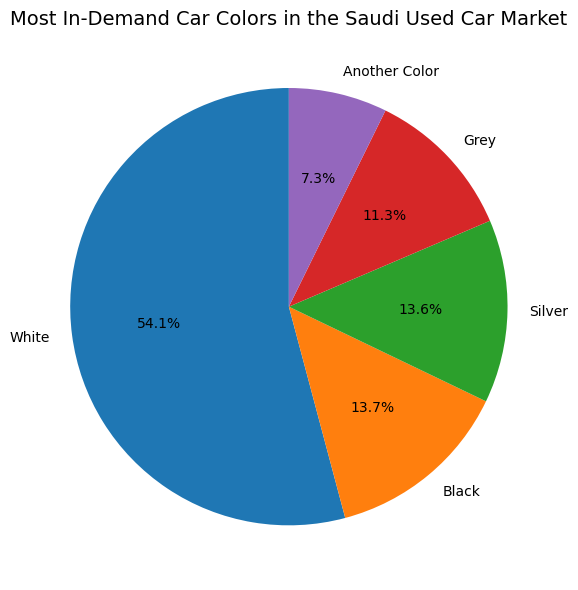

In [435]:
# Top 5 most in-demand colors in the used car market
high_demand_color=df_Used_Cars['Color'].value_counts().head(5)

# plot
plt.figure(figsize=(12, 6))
high_demand_color.plot(kind='pie',startangle=90, autopct='%1.1f%%')
plt.title("Most In-Demand Car Colors in the Saudi Used Car Market", fontsize=14)
plt.ylabel("") 
plt.tight_layout()
plt.show()


<small></small>

<small>From the above pie chart, we can conclude that white is by far the most in-demand color in the Saudi used car market, accounting for approximately 54.1% of listings, while other popular colors like black, silver, and grey each represent around 11–14%, with the rest falling into minor categories.</small>

### 3. What proportion of used cars have negotiable prices?

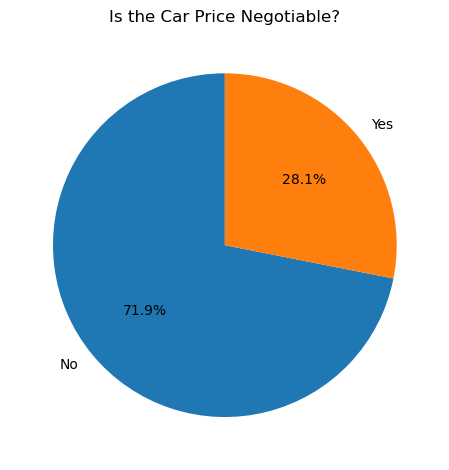

In [436]:
# Display percentage of negotiable vs non-negotiable cars
df_Used_Cars['Negotiable'].value_counts().plot(
    kind='pie',
    startangle=90,
    autopct='%1.1f%%',
    labels=['No', 'Yes'])
plt.title('Is the Car Price Negotiable?')
plt.ylabel('')
plt.tight_layout()
plt.show()

<small>From the above pie chart, we can conclude that the majority of used car listings in Saudi Arabia have fixed prices, while only a smaller portion are open to negotiation.</small>

### 4. What is the price variation among the most in-demand used car models in KSA?


C:\Users\HP\AppData\Local\Temp\ipykernel_18592\123926933.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


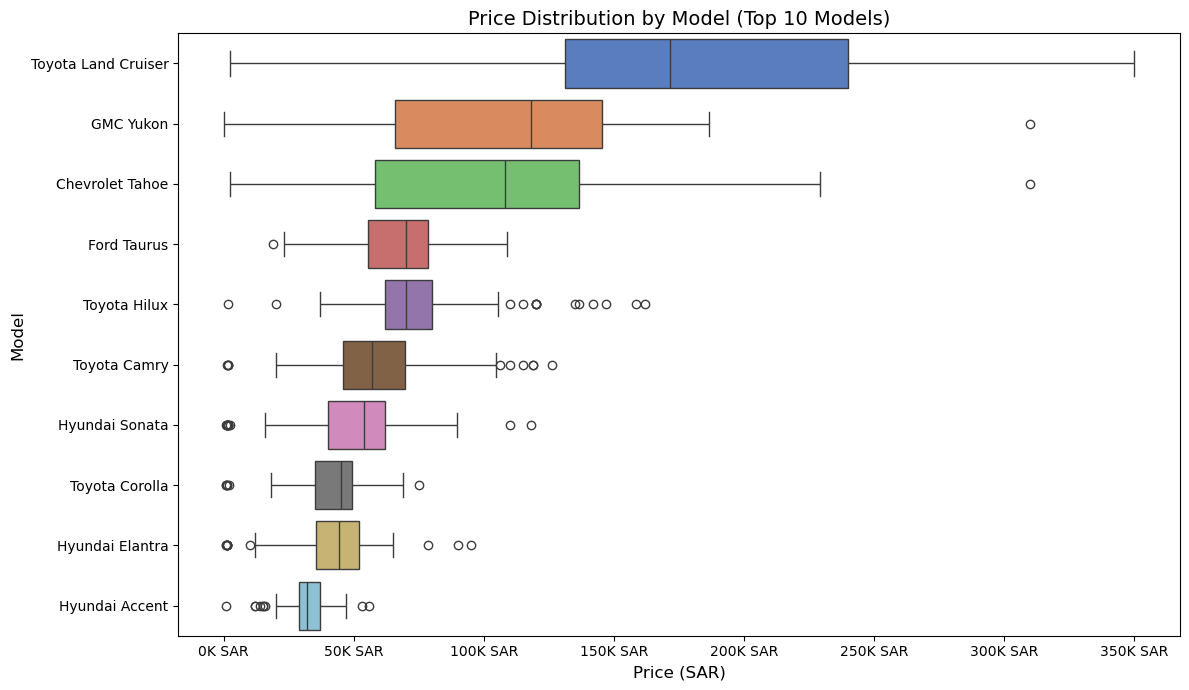

In [437]:
# Count number of listings for each car Type
valid_models = (
    df_Used_Cars.groupby('Type')
    .size()
)
# Keep only car Types with at least 5 listings
valid_models = valid_models[valid_models >= 5].index

# Select top 10 most in-demand car Types
top_models = (
    df_Used_Cars[df_Used_Cars['Type'].isin(valid_models)]
    .groupby('Type')
    .agg(
        count=('Price', 'count'),
        median_price=('Price', 'median')
    )
    .sort_values(by='count', ascending=False)
    .head(10)
    .index
)

# Filter dataset to include only top 10 expensive car Types
data = df_Used_Cars[df_Used_Cars['Type'].isin(top_models)]

# Order models by median price (Brand_Model level)
order = (
    data.groupby('Brand_Model')['Price']
    .median()
    .sort_values(ascending=False)
    .index
)
# plot
plt.figure(figsize=(12, 7))

sns.boxplot(
    data=data,
    y='Brand_Model',
    x='Price',
    order=order,
    palette='muted'
)

plt.title('Price Distribution by Model (Top 10 Models)', fontsize=14)
plt.xlabel('Price (SAR)',fontsize=12)
plt.ylabel('Model',fontsize=12)

plt.gca().xaxis.set_major_formatter(
    FuncFormatter(lambda x, pos: f'{int(x/1_000)}K SAR'))


plt.tight_layout()
plt.show()


<small>From the above figure, we can conclude that large and premium models like the Toyota Land Cruiser have a much wider and higher price range compared to smaller family sedans and compact cars, which show narrower distributions and generally stay in the lower price segments.</small>

### 5. What is the trend of used car prices over the years

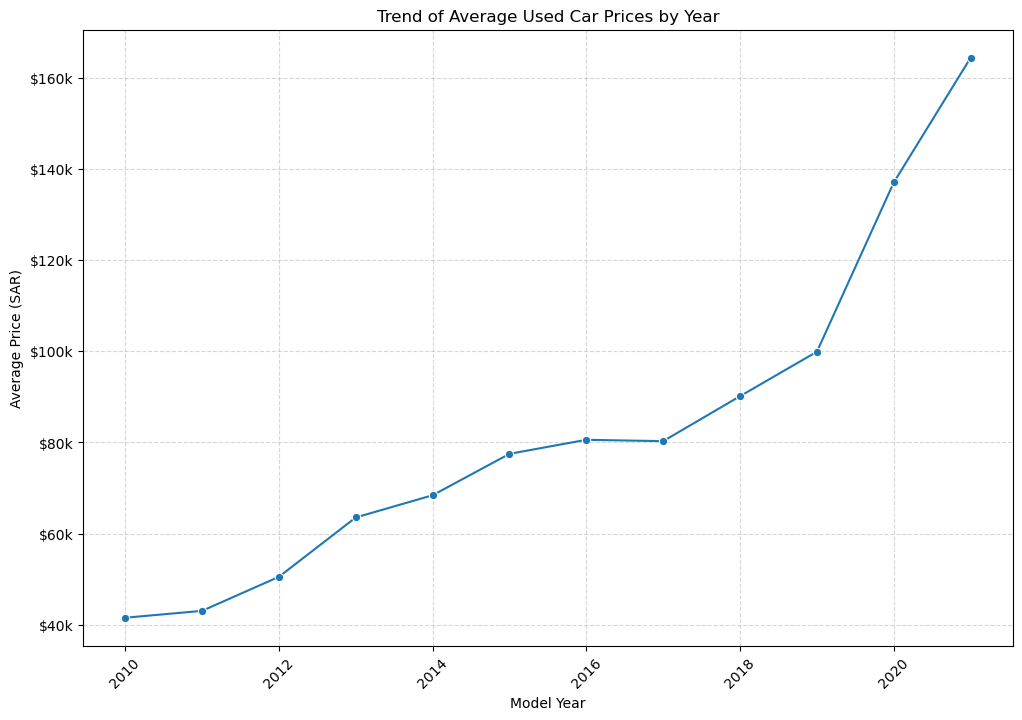

In [438]:
# Calculate average price per year
yearly_price = df_Used_Cars.groupby('Year')['Price'].mean().reset_index()

# plot
plt.figure(figsize=(12,8))
sns.lineplot(
    data=yearly_price,
    x='Year',
    y='Price',
    marker='o'
)

plt.title('Trend of Average Used Car Prices by Year',fontsize=12)
plt.xlabel('Model Year',fontsize=10)
plt.ylabel('Average Price (SAR)',fontsize=10)
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y ,pos:f'${int(y/1000)}k'))

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<small>
From the above figure, we can conclude that the average price of used cars in Saudi Arabia rises significantly with newer model years, showing a clear upward trend especially from 2018 onwards. Newer vehicles command much higher prices compared to older ones.</small>

### 6. Which vehicles tend to have higher mileage by year?

C:\Users\HP\AppData\Local\Temp\ipykernel_18592\1771870242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_mileage_by_year,x='Year',y='Mileage',palette='dark:b')


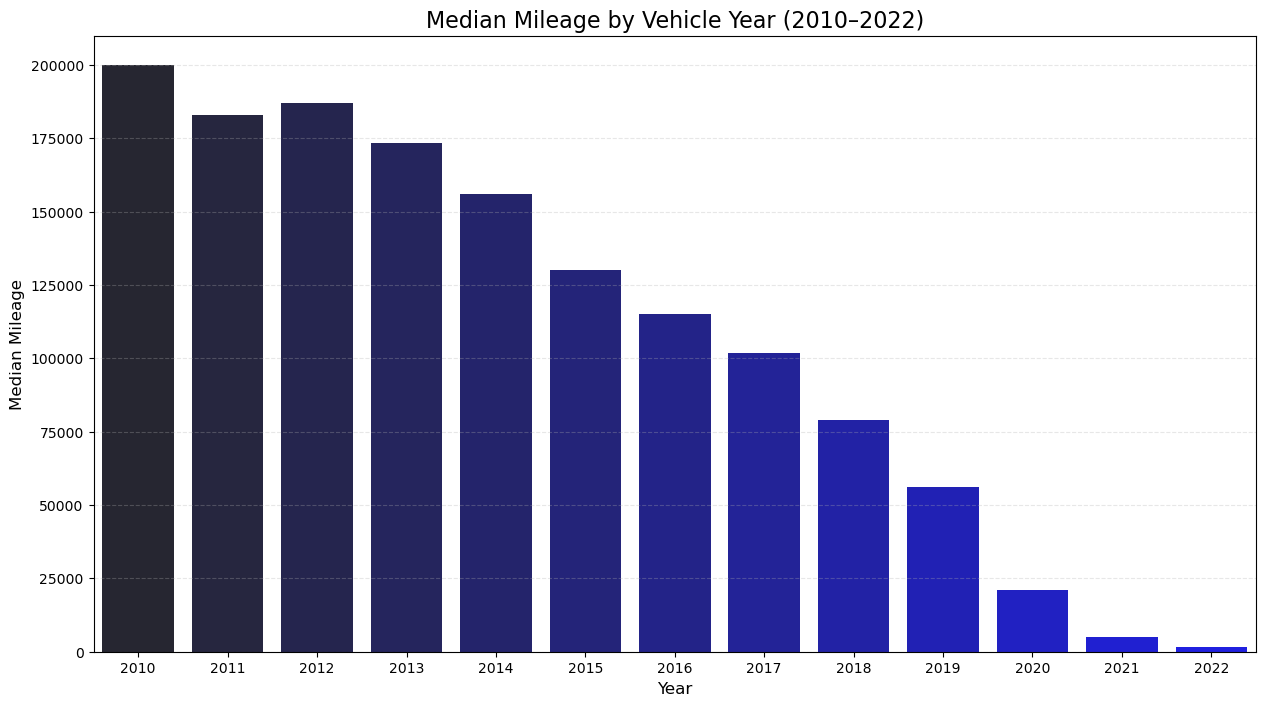

In [439]:
# Group by year and calculate median mileage
median_mileage_by_year = df_Used_Cars.groupby('Year')['Mileage'].median().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(data=median_mileage_by_year,x='Year',y='Mileage',palette='dark:b')
plt.title("Median Mileage by Vehicle Year (2010–2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Mileage", fontsize=12)
plt.xticks(median_mileage_by_year.index)  # show all years on x-axis

# Add grid for easier reading
plt.grid(axis='y', alpha=0.3, linestyle='--')


plt.show()

<small>From the above figure, we can conclude that high mileage has a negative impact on the resale price, but it can be considered positive in terms of the car's real-world user experience and proven reliability. Meanwhile, low mileage vehicles tend to have higher prices and appear more attractive to buyers in the used car market.</small>

### 7.What is the average vehicle price for the most in-demand car models by gearbox type?

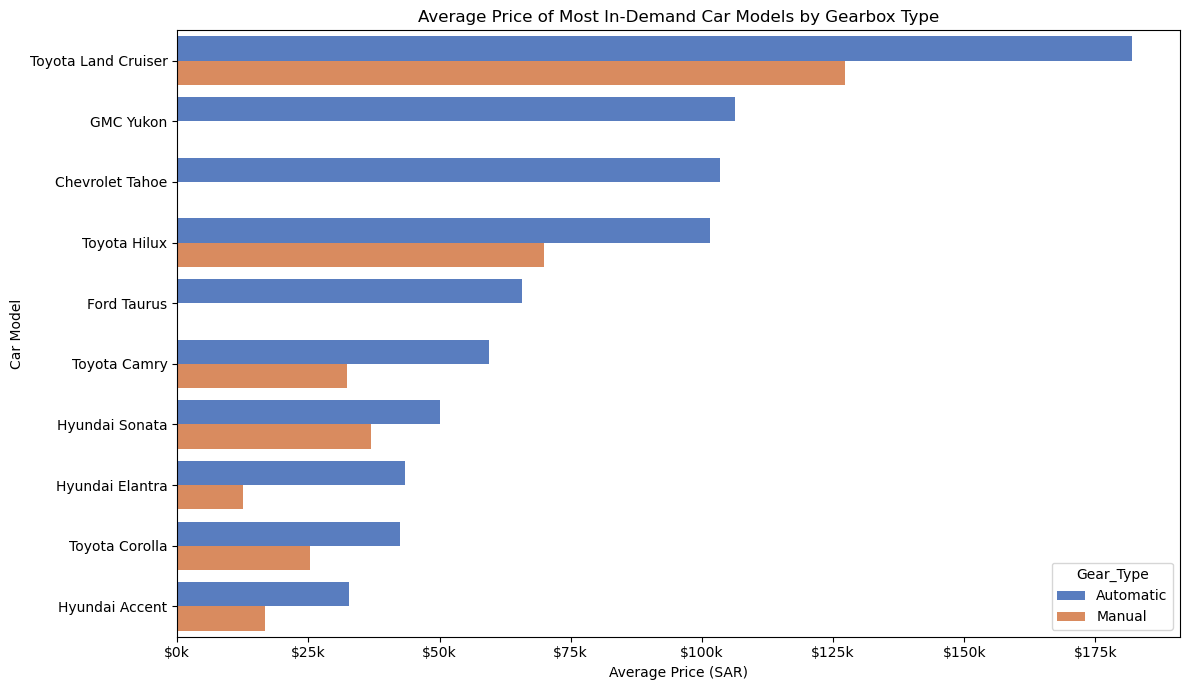

In [440]:
# Create Brand_Model column
top_brand_model=df_Used_Cars['Brand_Model'].value_counts().head(10).index

# Filter dataset
data_top_model=df_Used_Cars[df_Used_Cars['Brand_Model'].isin(top_brand_model)]

# Group by Brand_Model and Gear_Type
avg_price=(data_top_model.groupby(['Brand_Model', 'Gear_Type'])['Price']
            .mean()
            .reset_index()
            .sort_values('Price',ascending=False)
)

# plot
plt.figure(figsize=(12,7))
sns.barplot(data=avg_price,
            y='Brand_Model',
            x='Price',
            hue='Gear_Type',
            palette='muted')

plt.xlabel('Average Price (SAR)')
plt.ylabel('Car Model')

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}k'))

plt.title('Average Price of Most In-Demand Car Models by Gearbox Type')
plt.tight_layout()
plt.show()

<small>From the above figure, we can conclude that automatic versions are noticeably more expensive than manual ones in most popular models.
The gap is much larger in big vehicles like Land Cruiser, Yukon, Tahoe, and Hilux.
Not all models have manual versions (especially large ones), while smaller cars show a smaller difference.</small>

### 8. What is the average vehicle price based on the type of fuel and the type of gearbox?

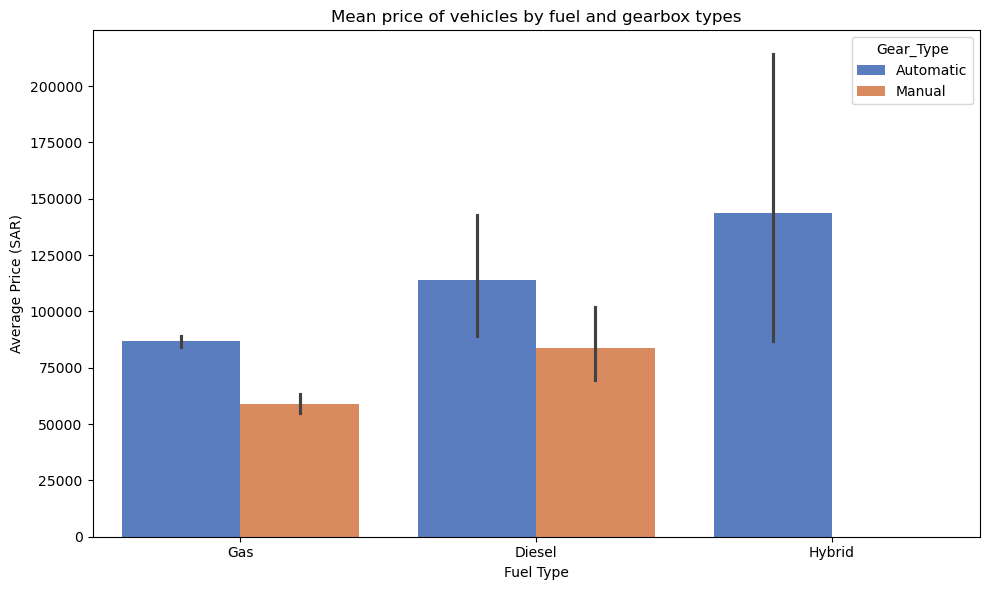

In [441]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Fuel_Type',
    y='Price',
    hue='Gear_Type',
    palette='muted',
    data=df_Used_Cars
)
plt.title("Mean price of vehicles by fuel and gearbox types")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price (SAR)")
plt.tight_layout()
plt.show()


<small>From the above figure, we can conclude that hybrid vehicles have the highest average price in the used car market, and they come exclusively with automatic transmission (no manual options are available).
Automatic cars are more expensive than manual ones across gas and diesel fuel types, with a noticeable price premium for the convenience and efficiency they offer.
Manual options remain the more affordable choice overall, appealing to buyers seeking lower prices in the gas and diesel segments.</small>

## Feature Relations

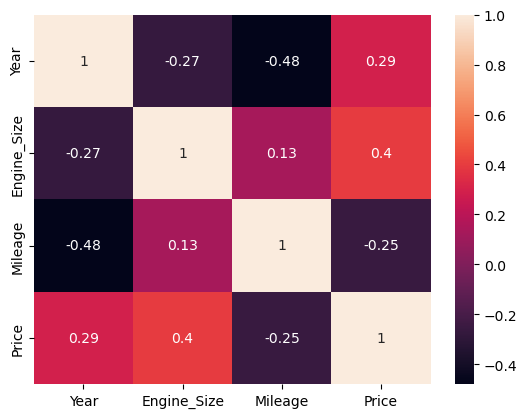

In [ ]:
# compute correlation for numeric columns
corr_matrix=df_Used_Cars.select_dtypes(include=['int64','float64']).corr()

#plot
sns.heatmap(corr_matrix, annot=True)
plt.show()

<small>From the above correlation matrix, we can conclude that newer cars with higher year values tend to have higher prices (positive correlation of 0.29) and lower mileage (strong negative correlation of -0.48), while larger engine size is linked to higher prices (moderate positive correlation of 0.40) and slightly newer models (negative correlation of -0.27 with year), and higher mileage strongly reduces price (negative correlation of -0.25) and is most common in older cars, making engine size the strongest positive influence on price overall, followed by newer manufacturing year, with high mileage having a clear negative effect.</small>